In [1]:
import numpy as np
#from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rand():
    return np.random.random()

In [3]:
#@jit(nopython=True) does not work with lists
def shoot(n):
    lst = list()
    for i in range(n):
        lst.append([rand(),rand()])
    return lst

In [4]:
def getNorm2(x,y):
    return x*x + y*y

In [5]:
def estimatePi(n, Nshots=1000):
    pi_est = list()
    
    for j in range(n):
        coord = shoot(Nshots)

        hit = 0
        norm2 = list()
        for i in range(len(coord)):
            norm2.append(getNorm2(coord[i][0],coord[i][1]))
            if norm2[i] < 1:
                hit+=1

        pi_est.append(4*hit/Nshots)
        #print(pi_est[j])
    
    return pi_est

In [6]:
def getVariance(lst):
    N = len(lst)
    
    var = 0.
    for i in range(N):
        var += (lst[i] - np.mean(lst))**2
    
    return var/N

In [7]:
n = 100
Nshoots = 10000
pi_est = estimatePi(n, Nshoots)

getVariance(pi_est)

0.00029612160000000003

In [10]:
X = np.array(range(10,10010,1000))
Y = np.array([getVariance(estimatePi(n, i)) for i in X])


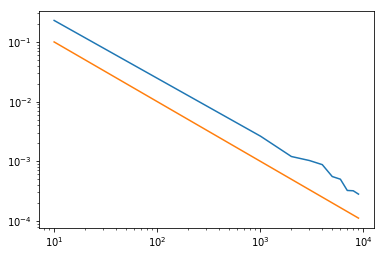

In [11]:
scale = lambda x: 1/x
Yscale = scale(X)

plt.loglog(X,Y)
plt.loglog(X,Yscale)
plt.show()